## 4.3 Two Dimensions - Maps

If we want to plot in two dimensions, the most obvious plot would be our data on a map! E.g. the average temperature:


In [12]:
t2tavg = ds.t2m.mean(dim = 'time')

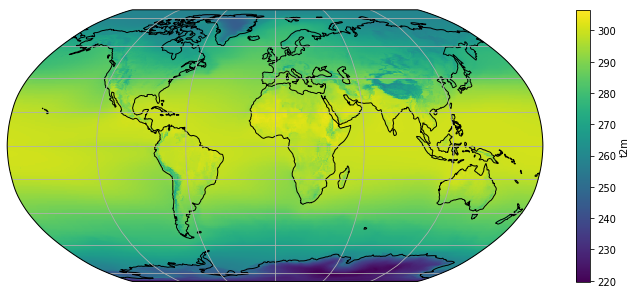

In [13]:
# Define the map projection
ax = plt.axes(projection=ccrs.Robinson())
# ax is an empty plot. We now plot the variable sw_avg onto ax
t2tavg.plot(ax = ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

What did we just do? Let's go through each step seperately. 

First, we created an axes object called `ax` just as before. The only new thing: we defined the projection of this axes! Therefore we used the cartopy library. From the [cartopy webpage](https://scitools.org.uk/cartopy/docs/latest/): Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. Key functions of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections. 
[Here](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html), you can find a list of all the possible projections! 

Some information about the Robinson Projection, that we used above: 
The robinson projection is pseudocylindrical, and a compromise that is neither equal-area nor conformal. Conformal means, that every angle between two curves that cross each other on Earth is preserved in the image of the projection (e.g. if two streets cross each other at an angle 90°, the angle on the map will also be 90°!).

The robinson projection is commonly used for “visually-appealing” world maps. We will most of the time use this type of projection. 

Anyway, we can try some others too!



### 4.3.1 Map Projections

E.g. `Mollweide`: This projection is pseudocylindrical, and equal area. Parallels are unequally-spaced straight lines, while meridians are elliptical arcs up to semicircles on the edges. Poles are points.
It is commonly used for world maps, or interrupted with several central meridians.

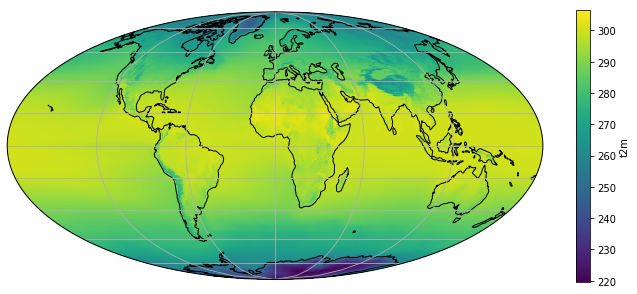

In [14]:
# Define the map projection
ax = plt.axes(projection=ccrs.Mollweide())
# ax is an empty plot. We now plot the variable sw_avg onto ax
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 

ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

The projection `PlateCarree` returns a map, that maps meridians to vertical straight lines of constant spacing (for meridional intervals of constant spacing), and circles of latitude to horizontal straight lines of constant spacing (for constant intervals of parallels). The projection is neither equal area nor conformal. The distortion gets bigger, the closer we get to the equator.

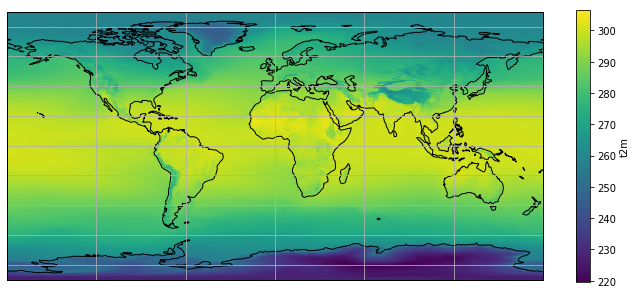

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines();

In plots as the two above ones, the south and north pole are not represented realistically. So if we want to have a closer look at regions such as the antarctica, we need to change our projection. `SouthPolarStereo()` or `NorthPolarStereo()` are the projections, that look from top directly on the South/Northpole.

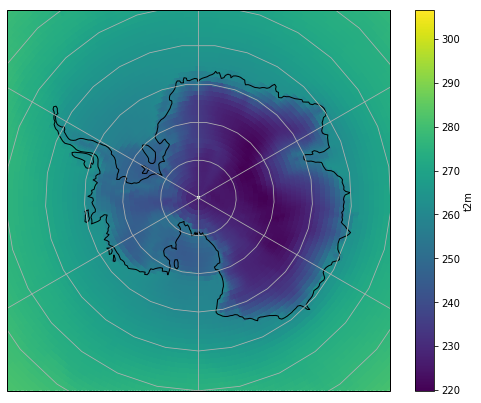

In [16]:
# Prepare the figure with the wanted size:
fig = plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree()) #explanation underneath!
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines();
ax.gridlines();

In order to make it a nice looking plot, we need to specify the extent of our axes (confine it to the antarctica) and change our figure size. To specify the extent: `ax.set_extent([lon_min, lon_max,lat_min,lat_max],projection_of_the_data)`.

There is also a special projection, to display europe as correctly as possible: `EuroPP`. 

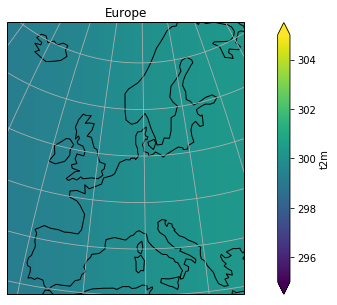

In [17]:
ax = plt.axes(projection=ccrs.EuroPP())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 295, vmax= 305)
plt.title('Europe')
ax.coastlines(); ax.gridlines();

Let's get back to our first map plot: What did we do next?

Second, we plotted our data. We specified two optional (**keyword**) arguments of the plot method: We defined our axes as the one we had just created above. Again here the result would have been the same without specifying the axes, since python would have known that we want to use the above created axes. Anyway, with more axes, things will get messy and so we made sure that python knows on which axes we want to plot by giving the keyword argument `ax=ax`. The second keyword argument we specified is the `transform` keyword. This tells the function in which projection the data is stored, in the case [ERA5 data](https://confluence.ecmwf.int/display/CKB/ERA5%3A+What+is+the+spatial+reference): PlateCarree. Now the function knows, that it will have to transform our data from the PlateCarree Projection into the Robinson Projection in order to make everything work. 

Third, we added coastlines (to be able to distinguish between land and ocean) and gridlines (latitude and longitude lines for better orientation). 

### 4.3.2 Map Options

Let's take our Europe Projection once more and try some map options on it!

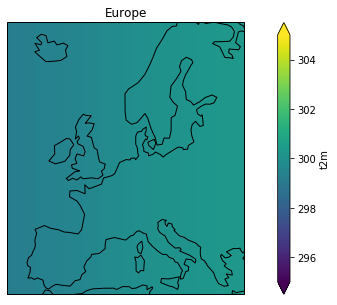

In [18]:
ax = plt.axes(projection=ccrs.EuroPP())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 295, vmax= 305)
plt.title('Europe')
ax.coastlines();

We already applied a first map option here: we added **coastlines** to be able to distinguish between land and ocean. We can change the color of those coastlines and furthermore, we can also add **country borders**:

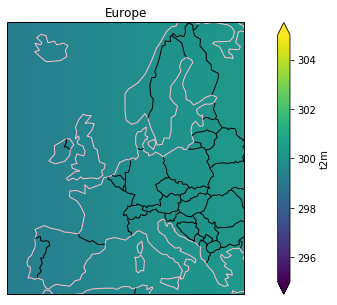

In [19]:
ax = plt.axes(projection=ccrs.EuroPP())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 295, vmax= 305)
plt.title('Europe')
ax.coastlines(color = 'pink'); 
ax.add_feature(cartopy.feature.BORDERS);

The borders are a pre-defined feature of the cartopy library! Therefore it is stored in `cartopy.feature.BORDERS` By calling the `ax.add_feature()` method, you can add any kind of feature to your plot (a feature is a collection of points, lines and polygons). 

Next, we can add **gridlines** to the plot. 

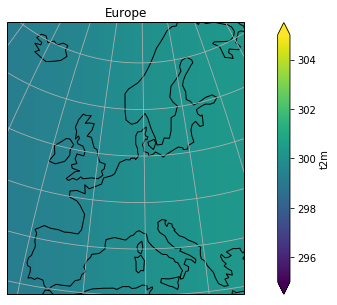

In [20]:
ax = plt.axes(projection=ccrs.EuroPP())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 295, vmax= 305)
plt.title('Europe')
ax.coastlines(); 
ax.gridlines();

If we use the PlateCarree or the Mercator projection, we can label those gridlines: 

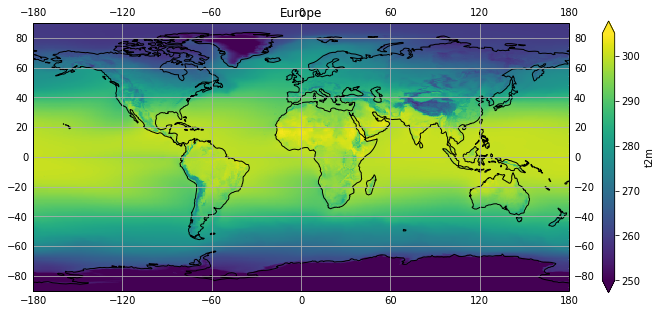

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 250, vmax= 305)
plt.title('Europe')
ax.coastlines(); 
ax.gridlines(draw_labels = True); #labels the gridlines!

We do not want the labeling on all four sides of the plot? We can turn them off each seperately!


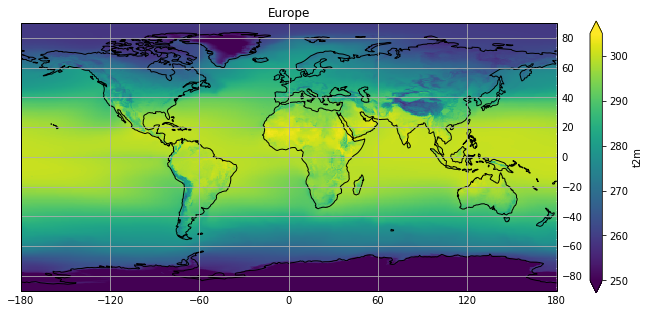

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())
t2tavg.plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 250, vmax= 305)
plt.title('Europe')
ax.coastlines(); 
grid = ax.gridlines(draw_labels = True); 
grid.ylabels_left = False;
grid.xlabels_top = False; # turn off top and left labeling

As for the axes, each matplotlib object has a 'handle'. Grid, in this case, is the handle of our gridlines. Therefore, we can change its properties by using the `.` syntax!